In [1]:
import os
from sys import path as sys_path

import pandas as pd
import numpy as np
from numpy.random import seed
seed(10)

import matplotlib.pyplot as plt
#%matplotlib inline

import seaborn as sns
sns.set(color_codes=True)

from scipy.stats import entropy

from sklearn.preprocessing import StandardScaler

import tensorflow as tf
tf.random.set_seed(10)
#tf.logging.set_verbosity(tf.logging.ERROR)

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers




2023-04-20 15:57:59.046870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import sys
from sys import path as sys_path

curr_dir = os.getcwd()
#check in the order sub-directory to main-directory
if 'autoencoder_lstm' in  curr_dir:
    os.chdir('..')
if 'models' in curr_dir in curr_dir:
    pass
elif 'bearing-vibration-anomaly-detection' in curr_dir:
    os.chdir('./models')
curr_dir = os.getcwd()
sys_path.insert(0, curr_dir)

import model_feedinput_pipeline
from model_feedinput_pipeline import CODE_ENV, DATASET_ID
from autoencoder_lstm.autoencoder_lstm_train_helper import *



 # Training

In [3]:
if __name__ == "__main__":

    #####################################################################################
    #***************IMP: Update coding environment********************
    #####################################################################################
    code_env = CODE_ENV.WSL
    curr_dataset = DATASET_ID.Second

    #Step 1 : Setup Data Source
    dataset_paths = model_feedinput_pipeline.get_dataset_paths(code_env)   

    #Step 2 : Read the time features generated earlier
    time_feature_data_filename=['timefeatures_1st_1.csv', 'timefeatures_1st_2.csv',
                                'timefeatures_2nd.csv', 'timefeatures_3rd.csv']

    tf_file_indx = 0
    cut_off_date_time = '2003-11-20 23:54:03'
    if curr_dataset == DATASET_ID.First:
        tf_file_indx = 0 #0 or 1
        cut_off_date_time = '2003-11-20 23:54:03'
    elif curr_dataset == DATASET_ID.Second:
        tf_file_indx = 2
        cut_off_date_time = '2004-02-15 12:52:39'
    elif curr_dataset == DATASET_ID.Third:
        tf_file_indx = 3
        cut_off_date_time = '2004-04-08 23:51:57'

    time_features_data = pd.read_csv(time_feature_data_filename[tf_file_indx])

    train, test, X_train, X_test, model, history = train_autoencoder_main(time_features_data, cut_off_date_time)

    # calculate the same metrics for the training set 
    # and merge all data in a single dataframe for plotting
    train_scored, X_train_pred, XTrain, threshold = pred_train_autoencoder(model, X_train, train)

    test_scored, X_test_pred, XTest = pred_test_autoencoder(model, X_test, test, threshold)



2023-04-20 15:58:01.291744: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-20 15:58:01.293864: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
43/43 [==============================] - 8s 36ms/step - loss: 0.7828 - val_loss: 0.7627
Epoch 2/100
43/43 [==============================] - 1s 19ms/step - loss: 0.7811 - val_loss: 0.7617
Epoch 3/100
43/43 [==============================] - 1s 18ms/step - loss: 0.7670 - val_loss: 0.7293
Epoch 4/100
43/43 [==============================] - 1s 19ms/step - loss: 0.7453 - val_loss: 0.7139
Epoch 5/100
43/43 [==============================] - 1s 16ms/step - loss: 0.7275 - val_loss: 0.7041
Epoch 6/100
43/43 [==============================] - 1s 18ms/step - loss: 0.7030 - val_loss: 0.7040
Epoch 7/100
43/43 [==============================] - 1s 16ms/step - loss: 0.6868 - val_loss: 0.6994
Epoch 8/100
43/43 [==============================] - 1s 15ms/step - loss: 0.6810 - val_loss: 0.6959
Epoch 9/100
43/43 [==============================] - 1s 14ms/step - loss: 0.6782 - val_loss: 0.6932
Epoch 10/100
43/43 [==============================] - 1s 12ms/step - loss: 0.6763 - val_loss: 0.6898

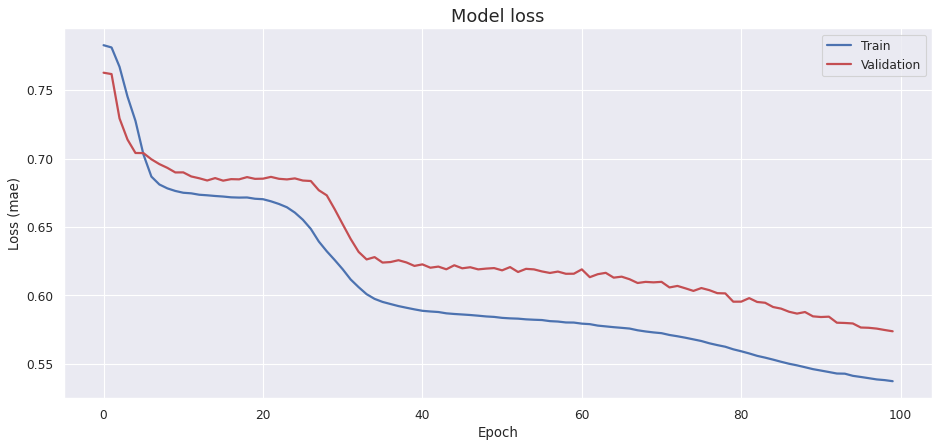

In [4]:
    # plot the training losses
    fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
    ax.plot(history['loss'], 'b', label='Train', linewidth=2)
    ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
    ax.set_title('Model loss', fontsize=16)
    ax.set_ylabel('Loss (mae)')
    ax.set_xlabel('Epoch')
    ax.legend(loc='upper right')
    plt.show()


(0.0, 0.5)

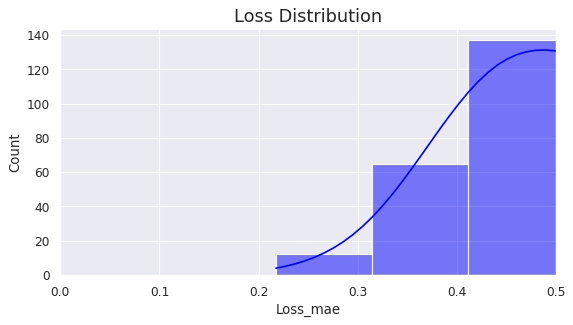

In [5]:
    plt.figure(figsize=(8,4), dpi=80)
    plt.title('Loss Distribution', fontsize=16)
    sns.histplot(train_scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
    plt.xlim([0.0,.5])


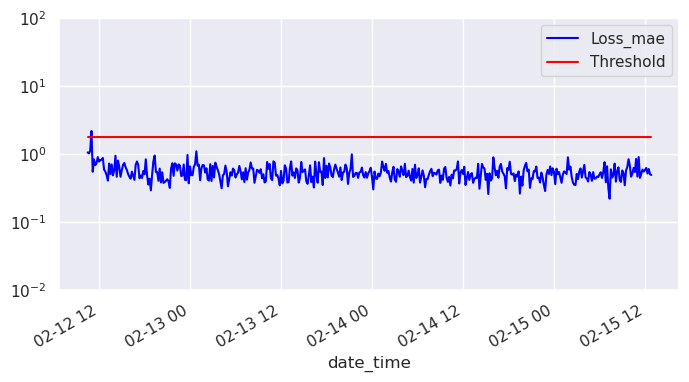

In [6]:
    train_scored.plot(logy=True,  figsize=(8,4), ylim=[1e-2,1e2], color=['blue','red'])
    plt.show()


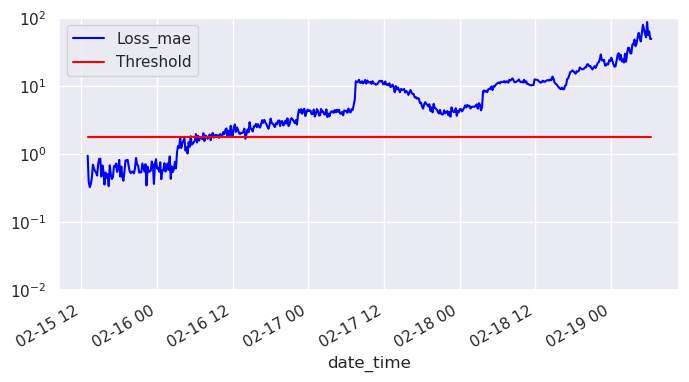

In [7]:
    # plot bearing failure time plot
    test_scored.plot(logy=True,  figsize=(8,4), ylim=[1e-2,1e2], color=['blue','red'])
    plt.show()


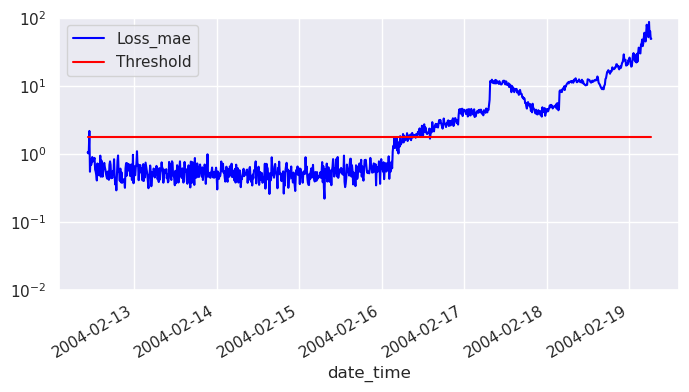

In [8]:
    scored = pd.concat([train_scored, test_scored])
    # plot bearing failure time plot
    scored.plot(logy=True,  figsize=(8,4), ylim=[1e-2,1e2], color=['blue','red'])
    plt.show()


In [9]:
    #save the model
    model.save('./bvad_ae_lstm')


    #zip manually in terminal
    #zip -r bvad_ae_lstm.zip bvad_ae_lstm



INFO:tensorflow:Assets written to: ./bvad_ae_lstm/assets


INFO:tensorflow:Assets written to: ./bvad_ae_lstm/assets


 # Testing

Threshold = 1.7632617515913593
40/40 [==============================] - 1s 37ms/step


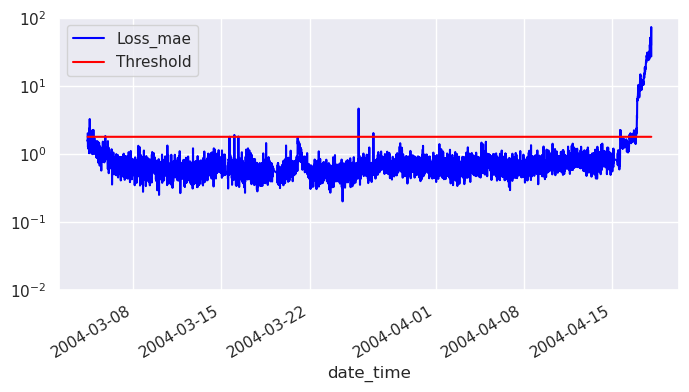

In [10]:
    #####################################################################################
    #***************IMP: Update coding environment********************
    #####################################################################################
    code_env = CODE_ENV.WSL
    curr_dataset = DATASET_ID.Third

    #Step 1 : Setup Data Source
    dataset_paths = model_feedinput_pipeline.get_dataset_paths(code_env)   

    #Step 2 : Read the time features generated earlier
    time_feature_data_filename=['timefeatures_1st_1.csv', 'timefeatures_1st_2.csv',
                                'timefeatures_2nd.csv', 'timefeatures_3rd.csv']

    tf_file_indx = 0
    cut_off_date_time = '2003-11-20 23:54:03'
    if curr_dataset == DATASET_ID.First:
        tf_file_indx = 1 #0 or 1
        cut_off_date_time = '2003-11-20 23:54:03'
    elif curr_dataset == DATASET_ID.Second:
        tf_file_indx = 2
        cut_off_date_time = '2004-02-15 12:52:39'
    elif curr_dataset == DATASET_ID.Third:
        tf_file_indx = 3
        cut_off_date_time = '2004-04-08 23:51:57'

    time_features_data = pd.read_csv(time_feature_data_filename[tf_file_indx])
    restored_model = tf.keras.models.load_model('./bvad_ae_lstm')

    #Step 1 : Re-construct the index columns 'date_time'    
    #print(time_features_data.describe().T)
    #print(time_features_data.columns)
    time_features_data=time_features_data.rename(columns={'filename':'date_time'})
    time_features_data['date_time']=pd.to_datetime(time_features_data['date_time'])   

    #Step 2 : Prepare Train, Validation and Test test
    train = time_features_data[time_features_data['date_time'] <= cut_off_date_time]
    test  = time_features_data[time_features_data['date_time'] > cut_off_date_time]
    train = train.set_index('date_time')
    test  = test.set_index('date_time')

    #Step 3 : Prepare Data : Normalize & Reshape
    X_train, X_test = scale_timefeature_data(train, test)
    X_train, X_test = prepare_lstm_input(X_train, X_test)

    print('Threshold =', threshold)
    # calculate the same metrics for the training set 
    # and merge all data in a single dataframe for plotting
    test_scored1, X_test_pred1, XTest1 = pred_test_autoencoder(restored_model, X_train, train, threshold)
    test_scored2, X_test_pred2, XTest2 = pred_test_autoencoder(restored_model, X_test, test, threshold)
    scored = pd.concat([test_scored1, test_scored2])

    # plot bearing failure time plot
    scored.plot(logy=True,  figsize=(8,4), ylim=[1e-2,1e2], color=['blue','red'])
    plt.show()
    pass


